<a href="https://colab.research.google.com/github/cy-jr/CPS570/blob/main/simple_stock_predcition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install Dependencies 
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [7]:
# load data set 
from google.colab import files 
uploaded = files.upload()

Saving ZM-JAN-JUN.csv to ZM-JAN-JUN.csv


In [8]:
# store data in data frame 
df = pd.read_csv('ZM-JAN-JUN.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,68.800003,69.235001,68.019997,68.720001,68.720001,1315500
1,2020-01-03,67.620003,68.680000,67.099998,67.279999,67.279999,1127900
2,2020-01-06,66.629997,70.495003,65.811996,70.320000,70.320000,3151600
3,2020-01-07,70.290001,72.838997,69.370003,71.900002,71.900002,6985400
4,2020-01-08,71.809998,73.290001,71.029999,72.550003,72.550003,2482300


In [10]:
# number of trading days 
df.shape

(124, 7)

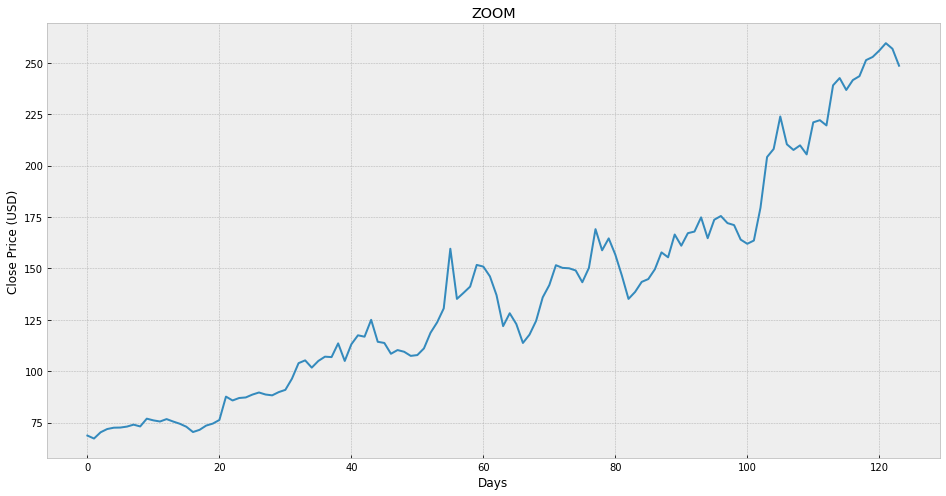

In [13]:
# Visualize the close price data 
plt.figure(figsize=(16,8))
plt.title('ZOOM')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.show()

In [14]:
# Get the close price 
df = df[['Close']]
df.head(2)

,Close
0,68.720001
1,67.279999


In [16]:
# predict price in 'x' days 
future_days = 29

# create new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
120,255.899994,NaN
121,259.510010,NaN
122,256.799988,NaN
123,248.559998,NaN


In [18]:
# Create the feature data set (x) and convert it to a numpy array, then remove the last 'x' row/days 
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 68.720001]
 [ 67.279999]
 [ 70.32    ]
 [ 71.900002]
 [ 72.550003]
 [ 72.620003]
 [ 73.089996]
 [ 74.029999]
 [ 73.160004]
 [ 76.940002]
 [ 76.110001]
 [ 75.559998]
 [ 76.730003]
 [ 75.540001]
 [ 74.470001]
 [ 73.      ]
 [ 70.440002]
 [ 71.510002]
 [ 73.580002]
 [ 74.540001]
 [ 76.300003]
 [ 87.660004]
 [ 85.790001]
 [ 86.989998]
 [ 87.260002]
 [ 88.639999]
 [ 89.669998]
 [ 88.68    ]
 [ 88.279999]
 [ 89.860001]
 [ 90.949997]
 [ 96.389999]
 [103.93    ]
 [105.290001]
 [101.760002]
 [105.010002]
 [107.080002]
 [106.879997]
 [113.550003]
 [105.      ]
 [113.110001]
 [117.470001]
 [116.800003]
 [125.      ]
 [114.32    ]
 [113.75    ]
 [108.489998]
 [110.300003]
 [109.470001]
 [107.470001]
 [107.860001]
 [111.099998]
 [118.709999]
 [123.769997]
 [130.550003]
 [159.559998]
 [135.179993]
 [138.110001]
 [141.149994]
 [151.699997]
 [150.880005]
 [146.119995]
 [137.      ]
 [121.93    ]
 [128.199997]
 [122.940002]
 [113.75    ]
 [117.809998]
 [124.510002]
 [135.919998]
 [141.889999]
 [151.

In [20]:
# Create the target data set (y) and convert it to numpy array then get all target values except the last 'n' rows 
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[ 89.860001  90.949997  96.389999 103.93     105.290001 101.760002
 105.010002 107.080002 106.879997 113.550003 105.       113.110001
 117.470001 116.800003 125.       114.32     113.75     108.489998
 110.300003 109.470001 107.470001 107.860001 111.099998 118.709999
 123.769997 130.550003 159.559998 135.179993 138.110001 141.149994
 151.699997 150.880005 146.119995 137.       121.93     128.199997
 122.940002 113.75     117.809998 124.510002 135.919998 141.889999
 151.559998 150.259995 150.059998 148.990005 143.270004 150.25
 169.089996 158.800003 164.600006 156.720001 146.479996 135.169998
 138.559998 143.440002 144.820007 149.589996 157.800003 155.399994
 166.479996 161.039993 167.139999 167.910004 174.830002 164.690002
 173.679993 175.479996 172.029999 171.059998 164.       161.970001
 163.550003 179.479996 204.149994 208.080002 223.869995 210.350006
 207.600006 209.830002 205.429993 221.020004 222.070007 219.520004
 239.020004 242.559998 236.759995 241.570007 243.479996 251.270004

In [21]:
# Split the data. 75% training, 25% testing 
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)


In [23]:
# Create the model - decision tree regressor model 
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [26]:
# get the last 'x' rows of the feature dataset 
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[113.75    ]
 [117.809998]
 [124.510002]
 [135.919998]
 [141.889999]
 [151.559998]
 [150.259995]
 [150.059998]
 [148.990005]
 [143.270004]
 [150.25    ]
 [169.089996]
 [158.800003]
 [164.600006]
 [156.720001]
 [146.479996]
 [135.169998]
 [138.559998]
 [143.440002]
 [144.820007]
 [149.589996]
 [157.800003]
 [155.399994]
 [166.479996]
 [161.039993]
 [167.139999]
 [167.910004]
 [174.830002]
 [164.690002]]


In [27]:
# show the model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear reg prediction 
lr_prediction  = lr.predict(x_future)
print(lr_prediction)

[173.679993 175.479996 172.029999 171.059998 157.800003 155.399994
 163.550003 179.479996 204.149994 208.080002 223.869995 210.350006
 207.600006 209.830002 241.570007 221.020004 144.820007 149.589996
 208.080002 242.559998 236.759995 241.570007 243.479996 251.270004
 252.809998 255.899994 259.51001  256.799988 209.830002]

[155.10366452 160.29185899 168.85366705 183.43428459 191.06323567
 203.42034403 201.75909485 201.50352248 200.13619871 192.82671789
 201.74632243 225.82159608 212.67220914 220.083923   210.01421403
 196.9287058  182.47587381 186.80789053 193.04395511 194.80743734
 200.90291583 211.3943281  208.32740211 222.48632657 215.53464989
 223.32973189 224.31370668 233.15664091 220.19892718]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


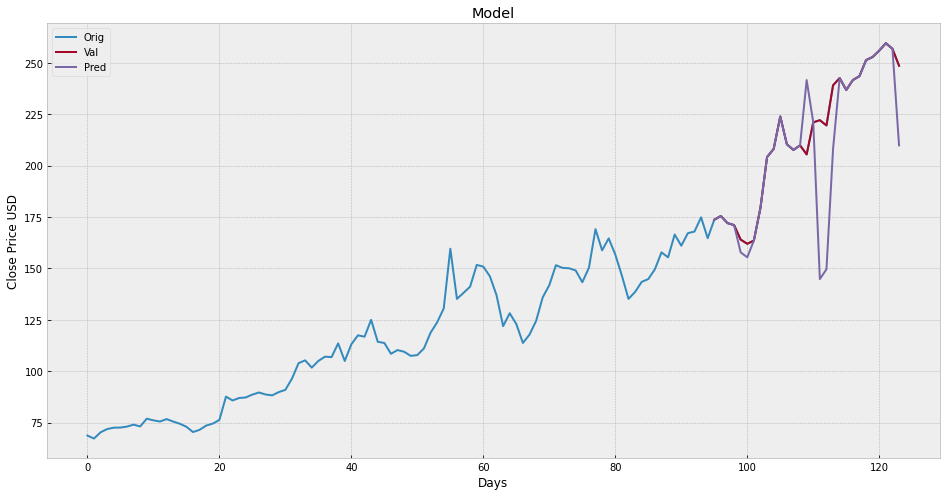

In [30]:
# Visualize the Data 

predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


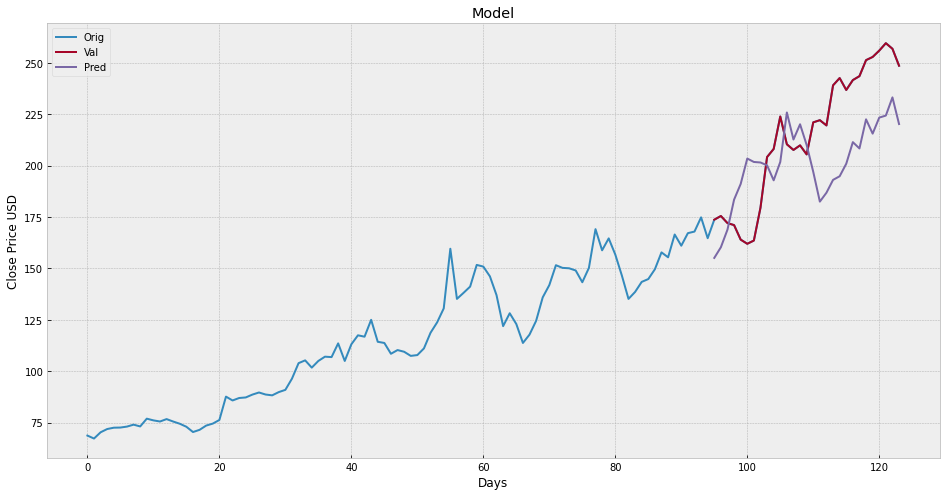

In [31]:
# Data Visuals

predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])